# Lumi Space Internship: Plotting a TLE <br>
**Olivia Marie Gough** <br><br>
A TLE, short for two-line element set, encodes a list of orbital elements of a satellite. This set of data can be used to predict a satellites position and velocity using simplified perturbations models. I will be using the libraries numpy and matplotlib  to visualise the data given. This model assumes the Earth to be perfectly spherical, however this can be modified using the line from the bottom cell.

**Concluding words...**<br>
A success of my code was plotting a 3D model of the Earth, which would be useful for visualising the satellite orbit. I was also able to print out the points that needed to be plotted. However, I wasn't able to actually plot the points. I included annotations of the methods I attempted to use so hopefully it's clear what the strengths of the code are.

In [ ]:
# 1 25544U 98067A   19091.54921296  .00002326  00000-0  44830-4 0  9994 
# 2 25544  51.6429  22.1968 0002430 134.4838 212.9945 15.52470701163348

In [53]:
line1= 1
satellite_number1 = 25544
classification1 = 'U' 
international_designator_year = 98
international_designator_number = 67
international_designator_piece = 'A'
epoch_year = 19
epoch_day = 091.54921296  
first_time_deriv = .00002326  
#second_time_deriv = 00000-0  
BSTAR = 44830-4 
zero = 0  
element_set = 999
checksum1 = 4 
'''1st line of TLE'''

line2 = 2 
satellite_number2 = 25544
inclination = 51.6429  
RA = 22.1968 
eccentricity = .0002430 
argument_perigee = 134.4838 
mean_anomaly = 212.9945 
mean_motion = 15.52470701
rev = 16334
checksum2 = 8
'''2nd line of TLE'''

'2nd line of TLE'

<IPython.core.display.Javascript object>


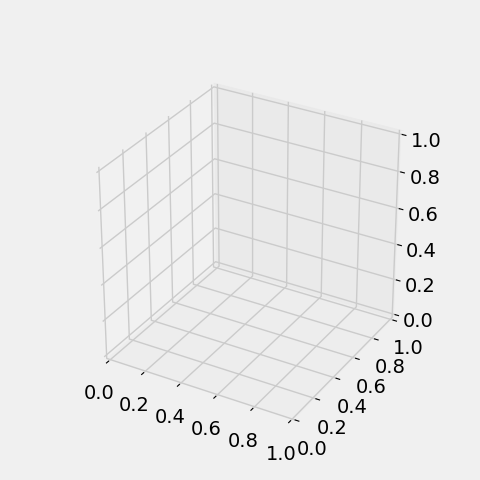

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
'''importing the relevant modules needed'''

figure = plt.figure(figsize=plt.figaspect(1))
ax = figure.add_subplot(111, projection='3d', aspect = 1)
max_radius = 0
'''plot axes'''

def earth_plot():
    '''Creates a 3d model of our simplified (homogenous/ non-oblate) earth. '''
    earth_radius = 6371
    global max_radius
    max_radius = max(max_radius,earth_radius)
    coeffecients = 1
    
    r = earth_radius/ np.sqrt(coeffecients)
    p = np.linspace(0, 2*np.pi, 100)
    q = np.linspace(0, np.pi, 100)
    
    x = r * np.outer(np.cos(p),np.sin(q))
    y = r * np.outer(np.sin(p),np.sin(q))
    z = r * np.outer(np.ones_like(p), np.cos(q))
    
    figure = plt.figure(figsize=plt.figaspect(1))
    ax = figure.add_subplot(111, projection='3d', aspect = 1)
    
    ax.plot_surface(x,y,z, rstride=4, cstride=4)
    plt.show()  
    return
    
def orbit_plot(semi_major_axis, eccentricity = .0002430, inclination = 51.6429,
               RA = 22.1968, argument_perigee = 134.4838, mean_anomaly = 212.9945, label = None):
    '''Aim to plot orbit of satellite'''
    inc = inclination * np.pi / 180.;
    R1 = np.array([[1, 0, 0],
                  [0, np.cos(inc), -np.sin(inc)],
                  [0, np.sin(inc), np.cos(inc)]]) #rotation matrix for inclination
    
    rot = (RA + argument_perigee) * np.pi/180
    R2 = np.array([[np.cos(rot), -np.sin(rot), 0],
                   [np.sin(rot), np.cos(rot), 0],
                   [0, 0, 1]]) #rotation matrix for perigee argument and RA
    
    theta = np.linspace(0, 2*np.pi, 360)
    r = (semi_major_axis*(1-eccentricity**2)) / (1 + eccentricity*np.cos(theta))
    
    xr = r*np.cos(theta)
    yr = r*np.sin(theta)
    zr = 0*theta 
    '''theta has length 360, thus we make a null vector of len 360'''
    
    pts = np.zeros(360*3)
    pts = pts.reshape(360,3)
    
    for i in range(len(xr)):
        pts[i,0]  = xr[i]
        pts[i,1]  = yr[i]
        pts[i,2]  = zr[i]
        
        
    print(np.shape(pts))
    pts = np.array([[xr],
                    [yr],
                    [zr]])
    

    pts = (R1 *R2*pts ).T
    xr,yr,zr = np.array(pts[:,0]), np.array(pts[:,1]), np.array(pts[:,2])
    print(np.shape(xr))

    ax.plot(xr,yr,zr, '-')
    plt.show()

    ANGLE = mean_anomaly * np.pi/180
    r_satellite = (semi_major_axis*(1-eccentricity**2)) / (1 + eccentricity*np.cos(ANGLE))
    x_satellite = r_satellite * np.cos(ANGLE)
    y_satellite = r_satellite * np.sin(ANGLE)
    z_satellite = 0

    satellite = (R1 * R2 * np.matrix([x_satellite, y_satellite, z_satellite]).T).flatten()
    x_satellite = satellite[0,0]
    y_satellite = satellite[0,1]
    z_satellite = satellite[0,2]

    c = np.sqrt(x_satellite**2 + y_satellite**2)
    lat = np.arctan2(z_satellite, c) * 180/np.pi
    long =  np.arctan2(y_satellite, x_satellite) * 180/np.pi

    ax.plot([x_satellite],[y_satellite],[z_satellite],'ro')
    
    global max_radius
    max_radius = max(max(r), max_radius)
    return

<IPython.core.display.Javascript object>


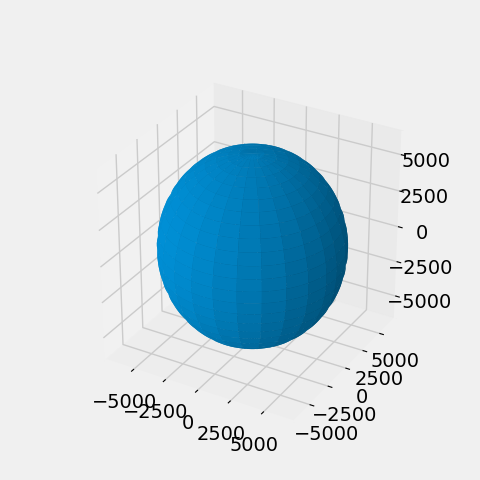

In [55]:
%matplotlib notebook
earth_plot()
#orbit_plot(3700)

In [ ]:
 #rx, ry, rz = [earth_radius/np.sqrt(coeffecients) for coefs in coeffecients]